<a href="https://colab.research.google.com/github/Ar1n382/gmt-projects-/blob/main/Orbit_sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=WTLPmUHTPqo



In [ ]:
import pygame
import math
pygame.init()

WIDHT, HEIGHT = 2000, 2000
WIN = pygame.display.set_mode((WIDHT, HEIGHT)) #takes innto ccordinates of the window
pygame.display.set_caption("Planet Simulation")#title



In [2]:
!pip install imageio

In [3]:
# Creating the planets

class Planet:
  # constants
  AU = 149.6e6 * 1000  # meters
  G = 6.67428e-11
  SCALE = 150 / AU  # 1AU = 50 pixels (Adjusted to fit all planets)
  TIMESTEP = 3600*24 # 1 day the interval that similatues the orbits movement

  def __init__(self, x, y, radius, color, mass):
    self.x = x
    self.y = y
    self.radius = radius
    self.color = color
    self.mass = mass  #kg

    self.sun = False # this is becuse we dont want to draw the orbit of the sun
    self.distance_to_sun = 0 # We are gonna update this for every dif planet
    self.orbit = [] # Keep track for all of the point the planet has went from

    self.x_vel = 0
    self.y_vel = 0 # These are for the planets to move within a circle

  def draw(self,win):
    x = self.x *self.SCALE + WIDHT / 2
    y = self.y *self.SCALE + HEIGHT / 2 # Changed to HEIGHT / 2 for correctness

    updated_points = []
    for point in self.orbit:
      x, y = point
      x = x * self.SCALE + WIDHT / 2
      y = y * self.SCALE + HEIGHT / 2
      updated_points.append((x,y))

    if len(updated_points) > 1: # Only draw lines if there are at least 2 points
      pygame.draw.lines(win, self.color, False, updated_points, 2)

    pygame.draw.circle(win, self.color, (x,y), self.radius)

  def attraction(self,other):
    # Firsy we calculate the distance from the 2 objetcs
    other_x, other_y = other.x, other.y
    distance_x = other_x - self.x
    distance_y = other_y - self.y
    distance = math.sqrt(distance_x ** 2 + distance_y ** 2)

    #if the other object is the sun we are gonna store the distance
    if other.sun:
      self.distance_to = distance
      #then we calculate the forcce of attraction
    force = self.G * self.mass * other.mass/ distance**2

    #Breaking down the force to the x and y component

    #finding the angle

    theta = math.atan2(distance_y, distance_x)
    force_x = math.cos(theta) * force
    force_y = math.sin(theta) * force
    return force_x, force_y

  # then we are gonna update the posştşons of the planets depending on the x and y variables

  def update_position(self, planets):
    total_fx = total_fy = 0
    for planet in planets:
      if self == planet:
        continue
      fx, fy = self.attraction(planet)
      total_fx += fx
      total_fy += fy

    self.x_vel += total_fx / self.mass * self.TIMESTEP
    self.y_vel += total_fy / self.mass * self.TIMESTEP

    self.x += self.x_vel * self.TIMESTEP
    self.y += self.y_vel * self.TIMESTEP
    self.orbit.append((self.x, self.y))

In [4]:
# Import and start virtual display        These are for the errors of pygame in the colab notebook
!pip install pyvirtualdisplay
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1000, 1000)) # Use the same dimensions as your Pygame window
display.start()

print("Virtual display started. You can now run Pygame code.")

Virtual display started. You can now run Pygame code.


/tmp/ipython-input-2512142276.py:70: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


Generated animated GIF: planet_simulation.gif


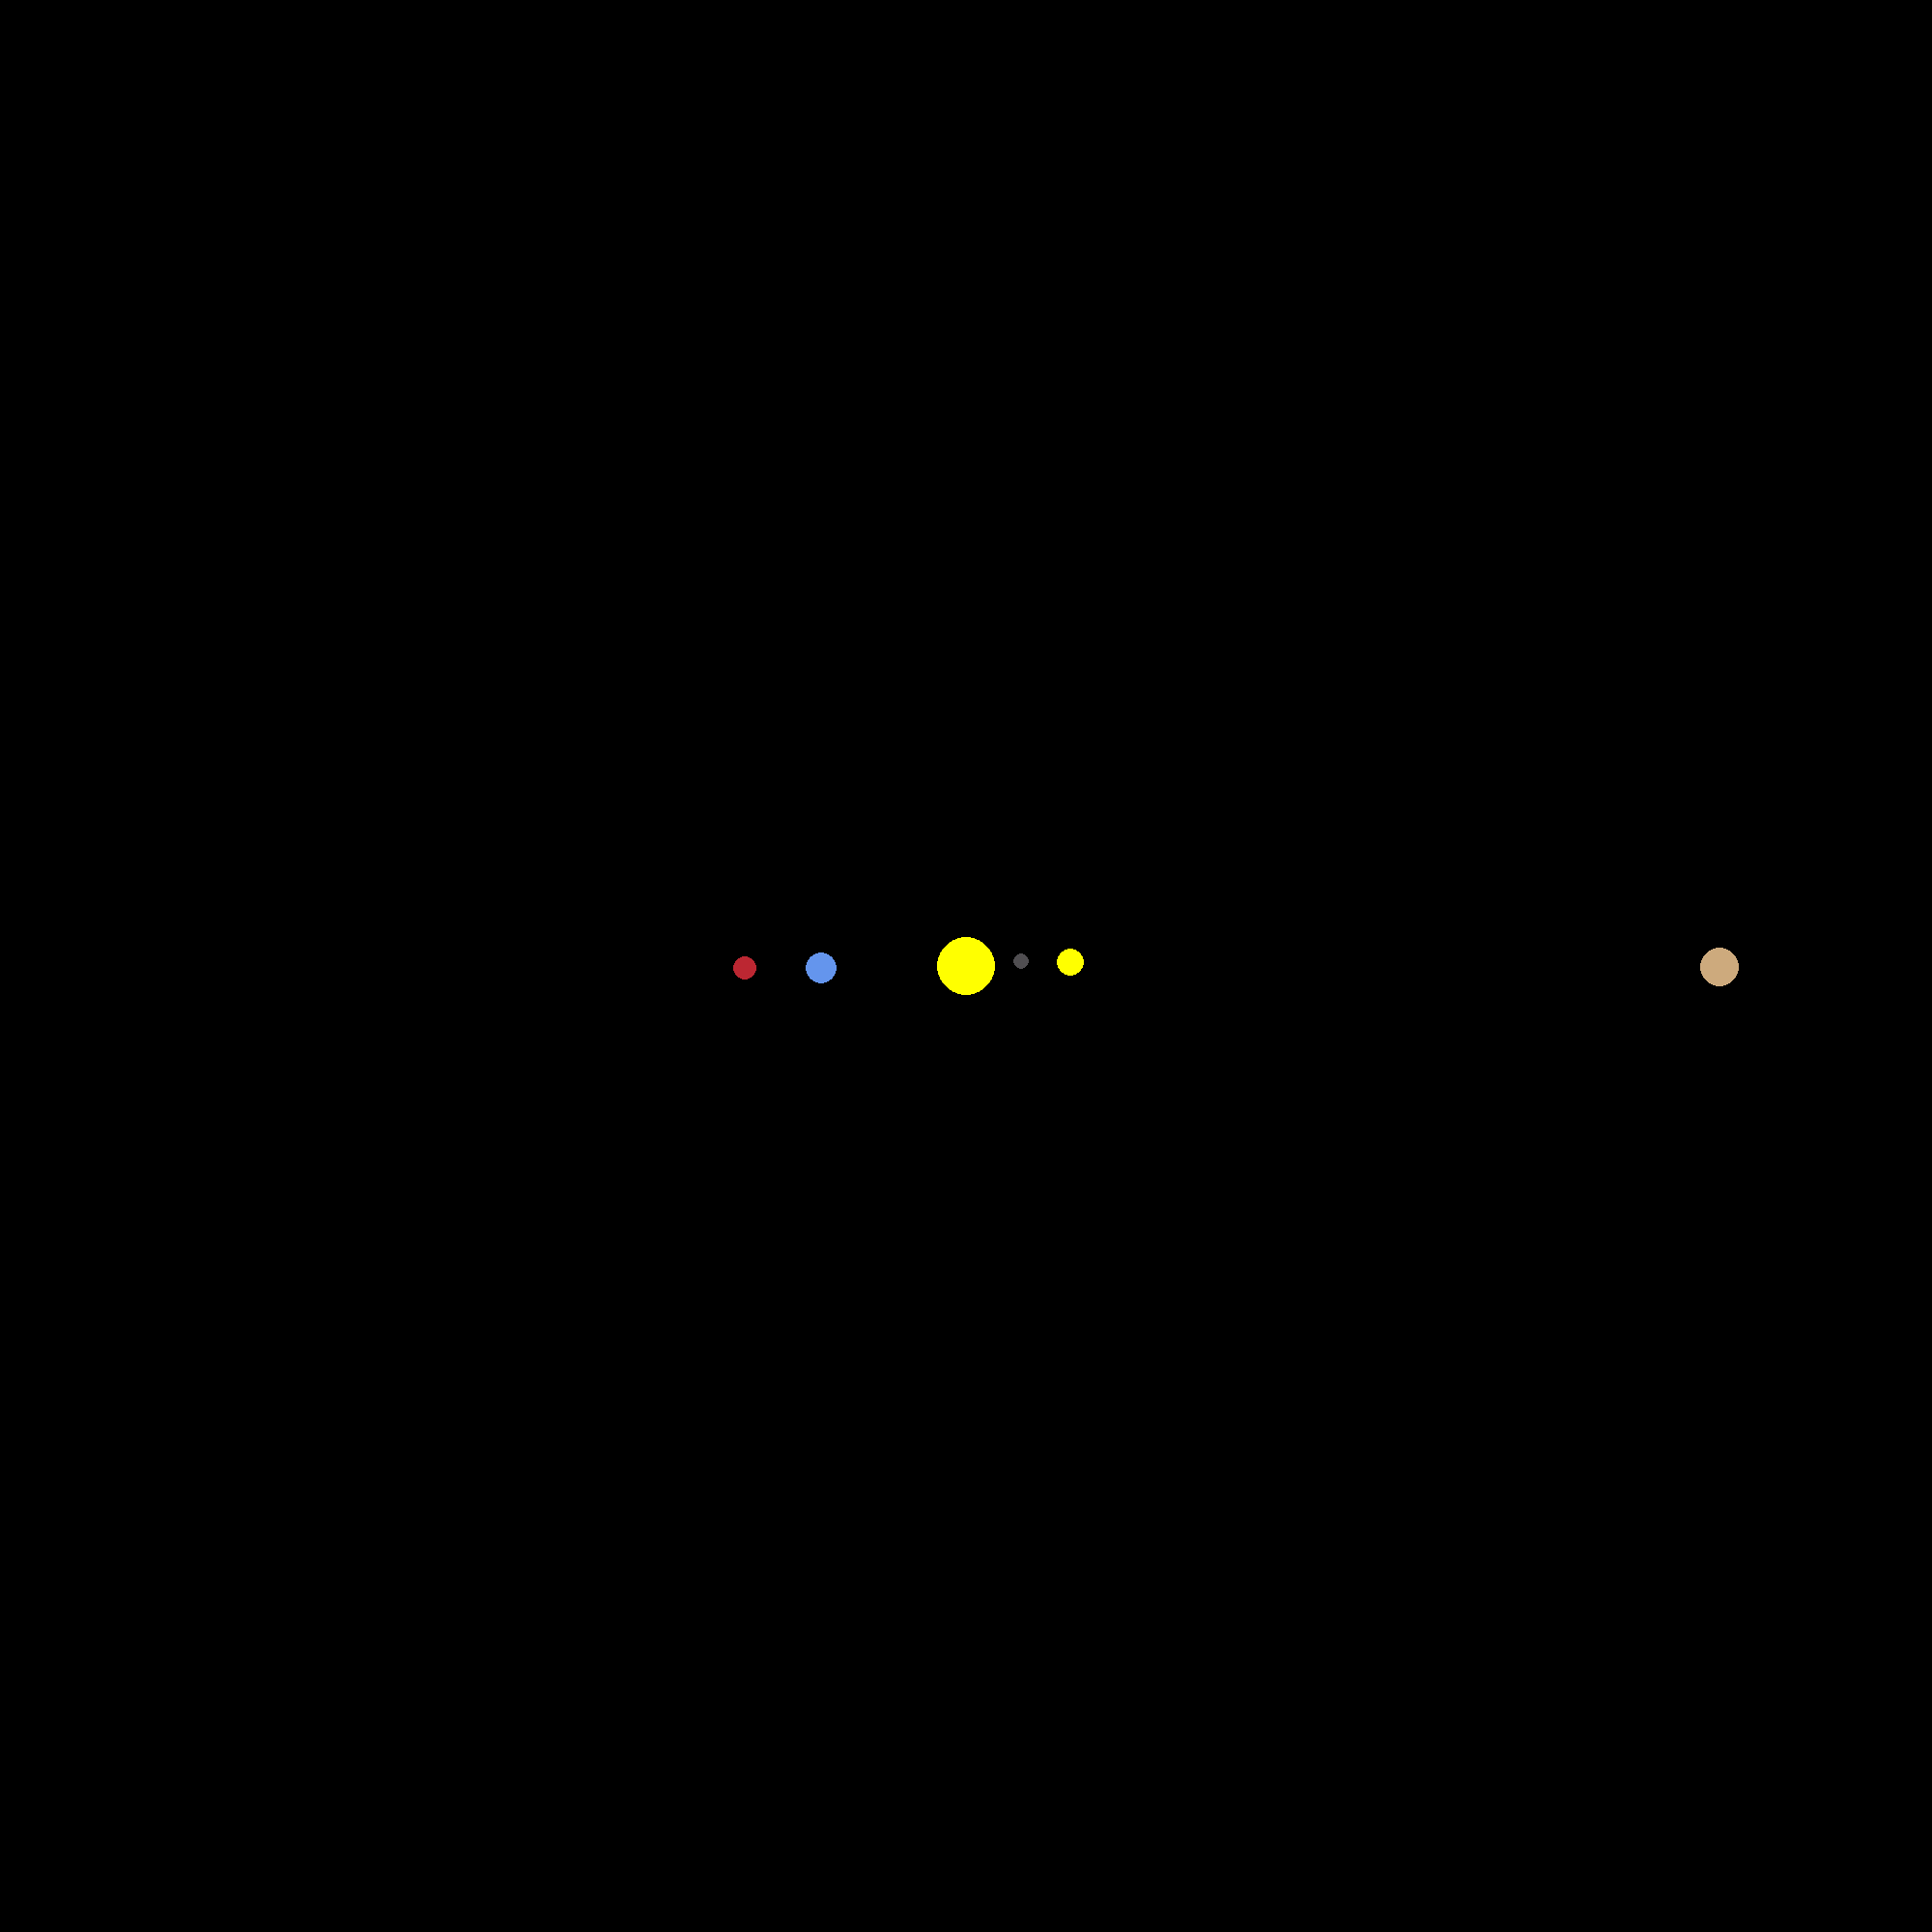

In [6]:
import pygame
from IPython.display import Image, display as display_image, HTML # Import HTML for GIF display
import imageio # For creating GIF from frames
import os # For managing temporary files

def main():
  global WIN
  run = True
  clock = pygame.time.Clock()

  WIN = pygame.display.set_mode((WIDHT, HEIGHT))

  sun = Planet(0, 0, 30, (255, 255, 0), 1.98892 * 10**30)
  sun.sun = True

  earth = Planet(-1 * Planet.AU, 0, 16, (100, 149, 237), 5.9742 * 10**24)

  earth.y_vel = 29.783 * 1000 # m/s


  mars = Planet(-1.524 * Planet.AU, 0, 12, (188, 39, 50), 6.39 * 10**23)
  mars.y_vel = 24.077 * 1000

  mercury = Planet(0.387 * Planet.AU, 0, 8, (80, 78, 81), 3.30 * 10**23)
  mercury.y_vel = -47.4 * 1000

  venus = Planet(0.723 * Planet.AU, 0, 14, (255, 255, 0), 4.8685 * 10**24)
  venus.y_vel = -35.02 * 1000

  jupiter = Planet(5.203 * Planet.AU, 0, 20, (205, 170, 125), 1.8986 * 10**27)
  jupiter.y_vel = 13.07 * 1000

  planets = [sun,earth,mars,mercury, venus, jupiter]

  # We'll run the loop to capture multiple frames for a GIF
  frames_to_capture = 375 # Significantly reduced for quicker rendering (75 frames at 15 FPS = 5 sec GIF)
  frame_count = 0
  captured_frames = [] # List to store paths of captured images

  while run:
    clock.tick(60)
    for event in pygame.event.get():
      if event.type == pygame.QUIT:
        run = False

    WIN.fill((0, 0, 0))

    for planet in planets:
      planet.update_position(planets)
      planet.draw(WIN)
    pygame.display.update()

    # Capture frame every few iterations for the GIF
    if frame_count % 5 == 0: # Capture every 5th frame to reduce GIF size
      frame_filename = f'frame_{frame_count:04d}.png'
      pygame.image.save(WIN, frame_filename)
      captured_frames.append(frame_filename)

    frame_count += 1
    if frame_count >= frames_to_capture: # Stop after capturing enough frames
      run = False

  pygame.quit()

  # Create GIF from captured frames
  if captured_frames:
    gif_filename = 'planet_simulation.gif'
    with imageio.get_writer(gif_filename, mode='I', fps=15) as writer: # Adjusted FPS for a longer GIF (approx 58 seconds)
      for filename in captured_frames:
        image = imageio.imread(filename)
        writer.append_data(image)
        os.remove(filename) # Clean up individual frame files
    print(f'Generated animated GIF: {gif_filename}')
    display_image(Image(gif_filename))

main()